### Plot brain regions (for binary SVM results)

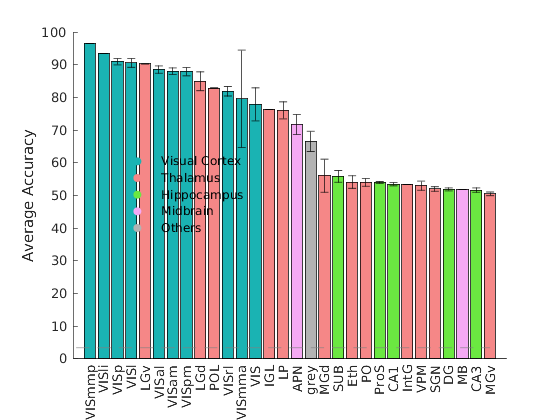

In [44]:
%% load decoding results
cd /rds/general/user/jx622/home/Enc+dec/Fig3
load binary_svm_20 units.mat

% Define regions and colors
CTX = ["VISp","VISal","VISam","VISl","VISpm","VISmma","VIS","VISli","VISrl","VISmmp"];
TH = ["LGd","LP","LGv","IGL","IntG","LD","RT","PP","TH","POL","MGm","MGv","Eth","PO","SGN","VPL","PIL","VPM","MGd","PoT"];
HCR = ["HPF","CA1","SUB","POST","ProS","DG","CA3","PRE","CA2"];
MB = ["NOT","APN","LT","MB","OP","SCig","PPT","SCiw","MRN"];
Other = ["grey","VL","Zl"];

region_sets = {CTX, TH, HCR, MB, Other};
colors = {[0.1 0.7 0.7], [0.9608 0.5294 0.5294], [0.4196 0.9098 0.2549], [0.9608 0.6627 0.9569], [0.7 0.7 0.7]}; % RGB colors

% Create mappings
region_to_color = containers.Map('KeyType', 'char', 'ValueType', 'any');
for k = 1:numel(region_sets)
    for region = region_sets{k}
        region_to_color(region) = colors{k};
    end
end
% Initialize drawing and color arrays
regions = unique(activity_table.Region_name);
bar_colors = zeros(length(regions), 3);
bar_means = zeros(1, length(regions));
bar_sems = zeros(1, length(regions));

for i = 1:length(regions)
    region_name = regions{i};
    if region_to_color.isKey(region_name)  % Check if this brain area is in the mapping
        bar_colors(i,:) = region_to_color(region_name);
    else
        bar_colors(i,:) = [0.7 0.7 0.7];  % If this brain region is not in the mapping, use the default color
    end
    
    % Combine data for the same region
    region_data = activity_table.Accuracy(strcmp(activity_table.Region_name, region_name), :);
    
    % Calculate mean and standard error
    bar_means(i) = nanmean(region_data, 'all');
    bar_sems(i) = nanstd(region_data, 0, 'all') / sqrt(sum(~isnan(region_data), 'all'));
end

% Sorted in order of average accuracy from highest to lowest
[bar_means, sort_indices] = sort(bar_means, 'descend');
bar_sems = bar_sems(sort_indices);
bar_colors = bar_colors(sort_indices, :);

% Creating bar
hold on;
for i = 1:length(regions)
    bar(i, bar_means(i), 'FaceColor', bar_colors(i,:));
    errorbar(i, bar_means(i), bar_sems(i), 'k', 'LineStyle', 'none');
end

% Setting the x-axis scale and labels
xticks(1:length(regions));
xticklabels(activity_table.Region_name);

ylabel('Average Accuracy')
yticks(0:10:100)

% chance level
plot([0, length(regions)], [100/30, 100/30], '--', 'Color', [0.5 0.5 0.5]);


% Add legend
hold on;
h1 = scatter(nan, nan, [], [0.1 0.7 0.7], 'filled');
h2 = scatter(nan, nan, [], [0.9608 0.5294 0.5294], 'filled');
h3 = scatter(nan, nan, [], [0.4196 0.9098 0.2549], 'filled');
h4 = scatter(nan, nan, [], [0.9608 0.6627 0.9569], 'filled');
h5 = scatter(nan, nan, [], [0.7 0.7 0.7], 'filled');
legend([h1, h2, h3, h4, h5], {'Visual Cortex', 'Thalamus', 'Hippocampus', 'Midbrain', 'Others'}, 'Location', 'best');
hold off;

lgd = legend([h1, h2, h3, h4, h5], {'Visual Cortex', 'Thalamus', 'Hippocampus', 'Midbrain', 'Others'}, 'Location', 'best');
lgd.Box = 'off';

set(gcf, 'Position', [50,350,900,380]);


### Plot brain regions (for multi-class SVM results)
Here note that multi-class SVM results is slightly different from binary SVM results

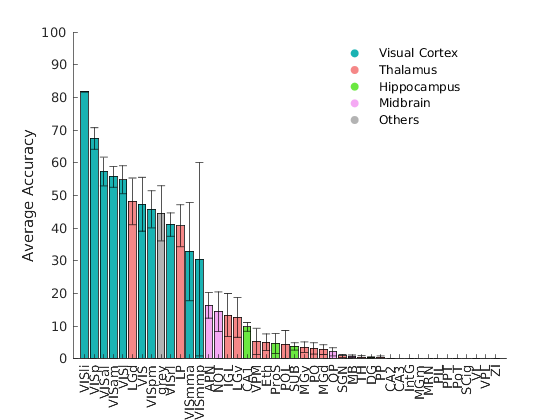

In [45]:
%% load decoding results
cd /rds/general/user/jx622/home/Enc+dec/Fig3
load Multiclass_decoding_accuracy_20_units.mat

%%define regions
CTX = ["VISp","VISal","VISam","VISl","VISpm","VISmma","VIS","VISli","VISrl","VISmmp"];
TH = ["LGd","LP","LGv","IGL","IntG","LD","RT","PP","TH","POL","MGm","MGv","Eth","PO","SGN","VPL","PIL","VPM","MGd","PoT"];
HCR = ["HPF","CA1","SUB","POST","ProS","DG","CA3","PRE","CA2"];
MB = ["NOT","APN","LT","MB","OP","SCig","PPT","SCiw","MRN"];

region_sets = {CTX, TH, HCR, MB};
colors = {[0.1 0.7 0.7], [0.9608 0.5294 0.5294], [0.4196 0.9098 0.2549], [0.9608 0.6627 0.9569]}; % RGB colors

%Convert the table to a matrix
result_matrix = table2array(result_table);

% Identify regions where all values are NaN
all_nan_cols = all(isnan(result_matrix), 1);

regions=result_table.Properties.VariableNames;
% Get the labels for the valid columns
valid_regions = regions(~all_nan_cols);
% Remove the NaN columns
valid_result_matrix = result_matrix(:, ~all_nan_cols);

% Calculate the mean and standard error of the mean (SEM) for each region
mean_values = nanmean(valid_result_matrix);
sem_values = nanstd(valid_result_matrix) ./ sqrt(sum(~isnan(valid_result_matrix)));

% Sort the regions by the mean values in descending order
[sorted_means, sorted_indices] = sort(mean_values, 'descend');
sorted_sems = sem_values(sorted_indices);
sorted_regions = valid_regions(sorted_indices);
sorted_matrix=valid_result_matrix(:,sorted_indices);

% Create a bar plot with error bars
figure;
b = bar(sorted_means, 'FaceColor', 'flat');
hold on;
box off;

% Assign colors to the bars
for i = 1:length(b.CData)
    region = sorted_regions{i};
    if ismember(region, CTX)
        b.CData(i, :) = colors{1};
    elseif ismember(region, TH)
        b.CData(i, :) = colors{2};
    elseif ismember(region, HCR)
        b.CData(i, :) = colors{3};
    elseif ismember(region, MB)
        b.CData(i, :) = colors{4};
    else
        b.CData(i, :) = [0.7 0.7 0.7];  % Gray color for regions not in the lists
    end
end

er = errorbar(1:length(sorted_means), sorted_means, sorted_sems);
er.Color = [0 0 0];                            
er.LineStyle = 'none';  

% Set the x-axis labels and rotate them for readability
xticks(1:length(sorted_regions));
xticklabels(sorted_regions);
xtickangle(90);

ylim([0 100])

% Set the labels and title
ylabel('Average Accuracy');

hold on
% add line based on chance level
plot([0, length(valid_regions)], [1/9, 1/9], '--', 'Color', [0.5 0.5 0.5]);  % ADD grey dash line


% add legend color
hold on;
h1 = scatter(nan, nan, [], [0.1 0.7 0.7], 'filled'); % Blue
h2 = scatter(nan, nan, [], [0.9608 0.5294 0.5294], 'filled'); % Red
h3 = scatter(nan, nan, [], [0.4196 0.9098 0.2549], 'filled'); % Green
h4 = scatter(nan, nan, [], [0.9608 0.6627 0.9569], 'filled'); % Purple
h5 = scatter(nan, nan, [], [0.7 0.7 0.7], 'filled'); % Grey
legend([h1, h2, h3, h4, h5], {'Visual Cortex', 'Thalamus', 'Hippocampus', 'Midbrain', 'Others'}, 'Location', 'best');
hold off;

% add legend
lgd = legend([h1, h2, h3, h4, h5], {'Visual Cortex', 'Thalamus', 'Hippocampus', 'Midbrain', 'Others'}, 'Location', 'best');
lgd.Box = 'off';

% set up height and width

set(gcf, 'Position', [50,350,900,380]);
